In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import schur, eig

# Asymmetric quorum-sensing active particles in 1D

Considering $N$ particles, each of which moves with velocity $v$ along direction $u_i = \pm 1$ which flips randomly with rate $\alpha$. The particle position $x_i$ evolves according to
$$
\partial_t x_i = v[\tilde{\rho}(x_i + \varepsilon u_i)] u_i + \sqrt{2D_t}\xi_i,
$$
where the local density $\tilde{\rho}(x_i +\varepsilon u_i)$ is measured with an offset $\varepsilon u_i$. 

The phase space densities $f^\pm(x, t)$ describing the probability to find a particles with position $x$ and orientation $u=\pm 1$ evolve according to

$$
\begin{aligned}
    \partial_t f^+ + \partial_x ( v[\tilde{\rho}(x + \varepsilon )] f^+)  = D_t \partial_x^2 f^+ - \alpha(f^+-f^-), \\ 
    \partial_t f^- - \partial_x ( v[\tilde{\rho}(x - \varepsilon )] f^-)  = D_t \partial_x^2 f^- + \alpha(f^+-f^-).
\end{aligned}
$$
When $\varepsilon$ is small, we can expand $\tilde{\rho}(x\pm \varepsilon)$ as
$$
\tilde{\rho}(x\pm \varepsilon) = \tilde{\rho}(x) \pm \varepsilon \partial_x \tilde{\rho}(x),
$$
which leads to
$$
v[\tilde{\rho}(x\pm \varepsilon)] = v[\tilde{\rho}(x)]\pm \varepsilon v' \partial_x\tilde{\rho}(x),
$$
where $v'=\partial_\rho v(\tilde{\rho})$. We then have
$$
\begin{aligned}
    \partial_t f^+ + \partial_x ( (v[\tilde{\rho}(x)] + \varepsilon v' \partial_x \tilde{\rho}(x)) f^+)  = D_t \partial_x^2 f^+ - \alpha(f^+-f^-), \\ 
    \partial_t f^- - \partial_x ( (v[\tilde{\rho}(x)] - \varepsilon v' \partial_x \tilde{\rho}(x)) f^-)  = D_t \partial_x^2 f^- + \alpha(f^+-f^-).
\end{aligned}
$$
Introducing $\rho = f^+ + f^-$, $m= f^+ - f^-$, we get
$$
\begin{aligned}
\partial_t \rho &= -\partial_x (v[\tilde{\rho}(x)]m + \varepsilon v' \partial_x\tilde{\rho}(x)\rho) + D_t \partial_x^2 \rho, \\
\partial_t m &= -\partial_x(v[\tilde{\rho}(x)]\rho - \varepsilon v' \partial_x\tilde{\rho}(x)m) + D_t \partial_x^2 m - 2\alpha m. \\
\end{aligned}
$$
Using the local approximation $\tilde{\rho}(x)=\rho(x)$, the linearized equations around the homogenous state $(\rho, m) = (\rho_0, 0)$ read
$$
\begin{aligned}
\partial_t \delta \rho &= -\partial_x(v_0 m + \varepsilon v' \rho_0 \partial_x \delta \rho) + D_t \partial_x^2 \delta \rho, \\
\partial_t m &= -\partial_x ((v_0 + \rho_0 v')\delta \rho ) + D_t \partial_x^2 m - 2\alpha m,
\end{aligned}
$$
where $v_0\equiv v(\rho_0)$ and $v'=\partial_\rho v(\rho_0)$.
In Fourier space, we get
$$
\partial_t \begin{pmatrix}
\delta \rho \\
m
\end{pmatrix} = (M - q^2 D_t I) \begin{pmatrix}
\delta \rho \\
m
\end{pmatrix},
$$
where the matrix $M$ read
$$
M(q)= \begin{pmatrix}
q^2 \varepsilon v' \rho_0 & -iq v_0 \\
-iq (v_0+\rho_0 v') & -2\alpha
\end{pmatrix}
$$
Denoting the eigenvalues of $M$ as $\sigma$, which are the roots of the quadratic equation
$$
\sigma^2 + (2\alpha - q^2 \varepsilon v'\rho_0)\sigma + q^2(v_0 (v_0 + v'\rho_0) - 2\alpha \varepsilon v'\rho_0)=0.
$$
The roots $\sigma_\pm$ reads
$$
\sigma_\pm =\frac{-b\pm\sqrt{\Delta}}{2}=\frac{
    q^2 \varepsilon v'\rho_0 - 2\alpha \pm \sqrt{(q^2\varepsilon v'\rho_0 + 2\alpha)^2 - 4q^2 v_0 (v_0 + \rho_0 v')}    
}{2}
$$

For $-b(q)=q^2\varepsilon v'\rho_0 - 2\alpha < 0$, to have positive $\Re(\sigma)$, we need $\Delta > 0$ and $\Delta > b^2$, which requires
$$
\frac{v'}{v_0} \left(
    1 - \frac{2\alpha \varepsilon}{v_0}    
\right) < -\frac{1}{\rho_0}
$$

If $\varepsilon v' > 0$, then $-b(q)=q^2 \varepsilon v' \rho_0 >0 $ can be true if $q^2 > \frac{2\alpha}{\varepsilon v'\rho_0}$. Under this condition, $\Re(\sigma_+(q)) >0$ for $q > \sqrt{\frac{2\alpha}{\varepsilon v'\rho_0}}$. 
We have 
$$
\Delta(q) = (\varepsilon v' \rho_0)^2 q^4 + 4(\rho_0 \alpha \varepsilon v'- v_0 (v_0 +\rho_0 v'))q^2 + 4 \alpha^2.
$$

In [19]:
def get_sigma(q, eps, alpha, v_prime, v0=1, rho0=1):
    b = 2 * alpha - q**2 * eps * v_prime * rho0
    Delta = (q**2 * eps * v_prime * rho0 + 2 * alpha) ** 2 - 4 * q**2 * v0 * (v0 + rho0 * v_prime) + 0j

    sigma = 0.5 * (-b + np.sqrt(Delta))
    return sigma

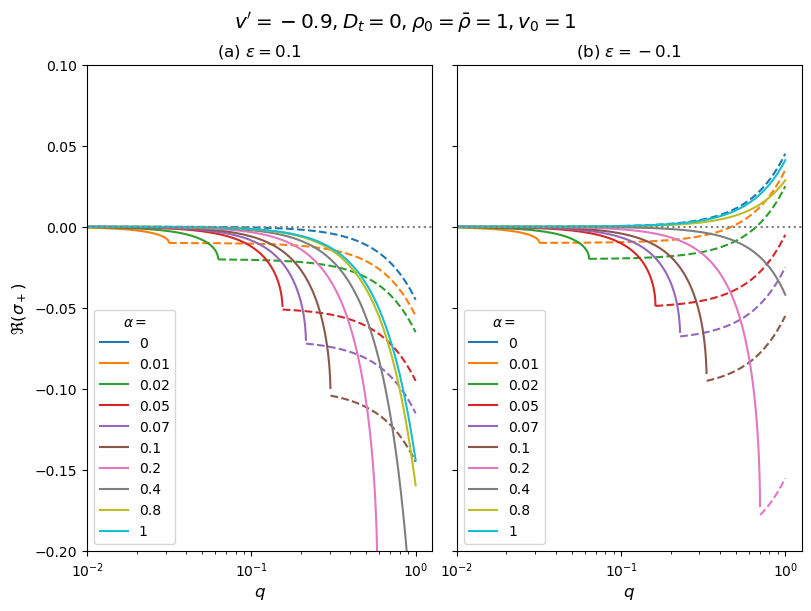

In [67]:
q_arr = np.logspace(-2, 0, 3000)
v_prime = -0.9
Dt = 0.
# alpha_arr = [0.01, 0.1, 1, 2, 4, 6, 8, 10]
alpha_arr = [0., 0.01, 0.02, 0.05, 0.07, 0.1, 0.2, 0.4, 0.8, 1]

fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True, constrained_layout=True)

for i, eps in enumerate([0.1, -0.1]):
    for alpha in alpha_arr:
        sigma = get_sigma(q_arr, eps, alpha, v_prime) - Dt * q_arr ** 2
        mask = np.abs(sigma.imag) < 1e-8
        line, = axes[i].plot(q_arr[mask], sigma[mask].real, label="%g" % alpha)
        mask = np.abs(sigma.imag) >= 1e-8
        axes[i].plot(q_arr[mask], sigma[mask].real, "--", c=line.get_c())
    axes[i].axhline(0, c="tab:grey", linestyle=":")
    axes[i].set_xscale("log")
    axes[i].set_ylim(-0.2, 0.1)
    axes[i].set_xlim(0.01)
    axes[i].legend(title=r"$\alpha=$")
    axes[i].set_xlabel(r"$q$", fontsize="large")
    if i == 0:
        axes[i].set_ylabel(r"$\Re(\sigma_+)$", fontsize="large")
    if i == 0:
        axes[i].set_title(r"(a) $\varepsilon=%g$" % eps, fontsize="large")
    else:
        axes[i].set_title(r"(b) $\varepsilon=%g$" % eps, fontsize="large")


title = r"$v'=%g, D_t=%g, \rho_0=\bar{\rho} = 1, v_0=1$" % (v_prime, Dt)
plt.suptitle(title, fontsize="x-large")

plt.show()
# plt.savefig("D:/sigma_v_prime_%g_varied_alpha_1D.pdf" % v_prime)
plt.close()

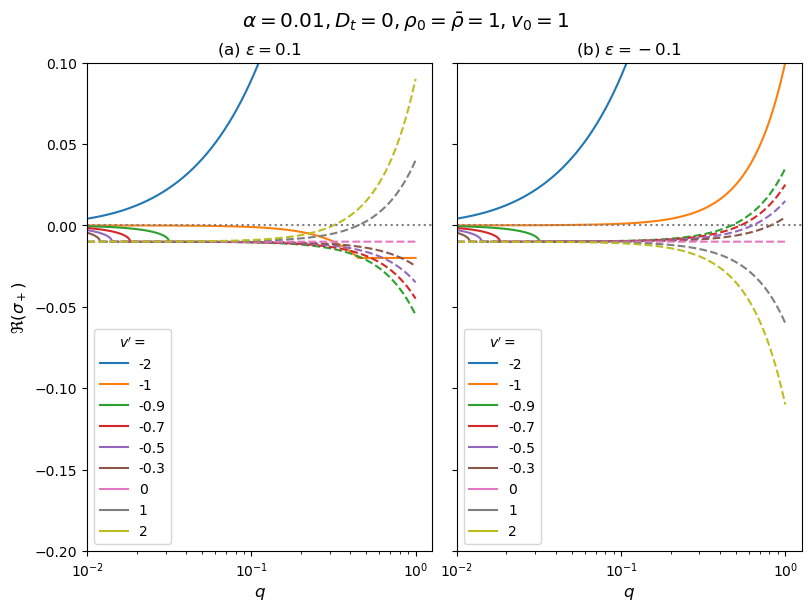

In [61]:
q_arr = np.logspace(-2, 0, 3000)
alpha = 0.01
Dt = 0.


fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True, constrained_layout=True)

for i, eps in enumerate([0.1, -0.1]):
    for v_prime in [-2, -1, -0.9, -0.7, -0.5, -0.3, 0, 1, 2]:
        sigma = get_sigma(q_arr, eps, alpha, v_prime) - Dt * q_arr ** 2
        mask = np.abs(sigma.imag) < 1e-8
        line, = axes[i].plot(q_arr[mask], sigma[mask].real, label="%g" % v_prime)
        mask = np.abs(sigma.imag) >= 1e-8
        axes[i].plot(q_arr[mask], sigma[mask].real, "--", c=line.get_c())
    axes[i].axhline(0, c="tab:grey", linestyle=":")
    axes[i].set_xscale("log")
    axes[i].set_ylim(-0.2, 0.1)
    axes[i].set_xlim(0.01)
    axes[i].legend(title=r"$v'=$")
    axes[i].set_xlabel(r"$q$", fontsize="large")
    if i == 0:
        axes[i].set_ylabel(r"$\Re(\sigma_+)$", fontsize="large")
    if i == 0:
        axes[i].set_title(r"(a) $\varepsilon=%g$" % eps, fontsize="large")
    else:
        axes[i].set_title(r"(b) $\varepsilon=%g$" % eps, fontsize="large")


title = r"$\alpha=%g, D_t=%g, \rho_0=\bar{\rho} = 1, v_0=1$" % (alpha, Dt)
plt.suptitle(title, fontsize="x-large")

plt.show()
# plt.savefig("D:/sigma_alpha%g_varied_v_prime_1D.pdf" % alpha)
plt.close()

In [45]:
class DMatrix22:
    def __init__(self, eps, v_prime, alpha, v0=1, rho0=1):
        self.eps = eps
        self.v_prime = v_prime
        self.v0 = v0
        self.rho0 = rho0
        self.alpha = alpha

    def get_M(self, q):
        M = np.zeros((2, 2), complex)
        M[0, 0] = q**2 * self.eps * self.v_prime * self.rho0
        M[0, 1] = -1j * q * self.v0
        M[1, 0] = -1j * (self.v0 + self.rho0 * self.v_prime)
        M[1, 1] = -2 * self.alpha
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1]])
        return eigen_values
    
    def get_eigen_values_vectors(self, q):
        M = self.get_M(q)
        w, vr = eig(M)
        return w, vr
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real

In [54]:
eps = -0.1
v_prime = -0.9
alpha = 0.01
q = 1

mat = DMatrix22(eps, v_prime, alpha)

mat.get_eigen_values_vectors(q)


(array([0.035+0.31140809j, 0.035-0.31140809j]),
 array([[ 0.95346259+0.j        ,  0.95346259+0.j        ],
        [-0.29691597-0.05244044j,  0.29691597-0.05244044j]]))